In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Sujithkumar/Desktop/Cognifyz/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [3]:
if 'Has Table booking' in df.columns:
    table_booking_counts = df['Has Table booking'].value_counts()
    percent_table_booking = (table_booking_counts.get('Yes', 0) / table_booking_counts.sum()) * 100
    print(f"Table Booking Available: {percent_table_booking:.2f}%")
else:
    print("Column 'Has Table booking' not found.")

Table Booking Available: 12.12%


In [4]:
if 'Has Online delivery' in df.columns:
    online_delivery_counts = df['Has Online delivery'].value_counts()
    percent_online_delivery = (online_delivery_counts.get('Yes', 0) / online_delivery_counts.sum()) * 100
    print(f"Online Delivery Available: {percent_online_delivery:.2f}%")
else:
    print("Column 'Has Online delivery' not found.")

Online Delivery Available: 25.66%


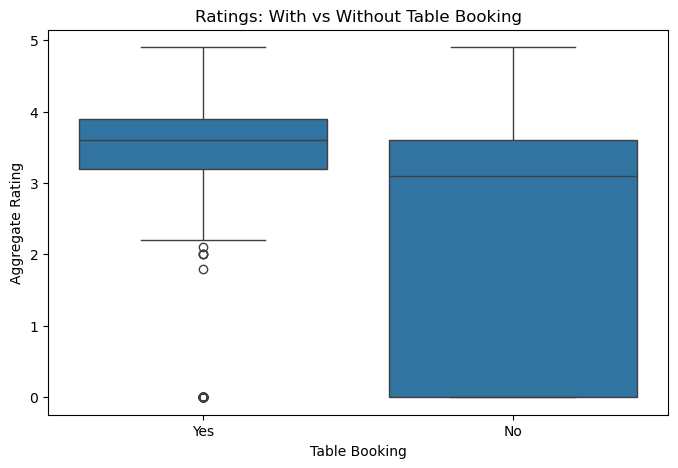

Average Ratings:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'Has Table booking' in df.columns and 'Aggregate rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Has Table booking', y='Aggregate rating')
    plt.title('Ratings: With vs Without Table Booking')
    plt.xlabel('Table Booking')
    plt.ylabel('Aggregate Rating')
    plt.show()

    mean_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()
    print("Average Ratings:\n", mean_ratings)
else:
    print("Relevant columns not found for comparison.")

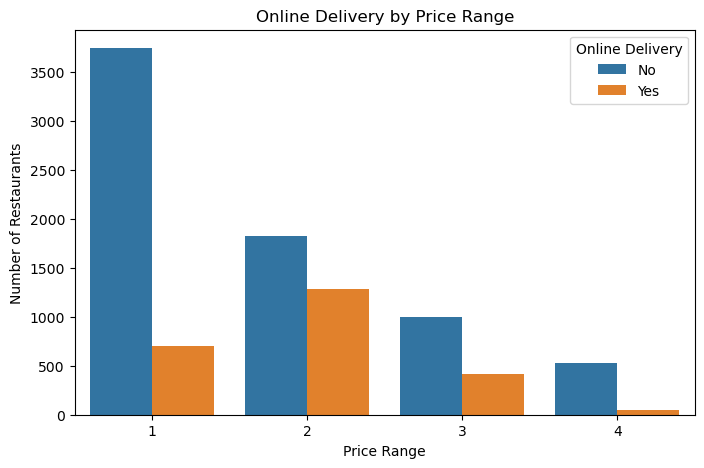


Percentage of Online Delivery by Price Range:
 Price range
1    15.77
2    41.31
3    29.19
4     9.04
dtype: float64


In [6]:
if 'Price range' in df.columns and 'Has Online delivery' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Price range', hue='Has Online delivery')
    plt.title('Online Delivery by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Restaurants')
    plt.legend(title='Online Delivery')
    plt.show()

    delivery_rate = df[df['Has Online delivery'] == 'Yes'].groupby('Price range').size() / df.groupby('Price range').size()
    print("\nPercentage of Online Delivery by Price Range:\n", (delivery_rate * 100).round(2))
else:
    print("Required columns for price and delivery analysis not found.")